# <center>Prediction using K-Means<center>

## Author:Sanjila Gangaju

## Objective:From the given 'Iris' dataset,predict the optimum number of clusters and represent it visually

## 1.Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## 2.Importing the iris dataset

In [2]:
iris=datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.drop(['sepal length (cm)','sepal width (cm)'],axis=1,inplace=True)

In [7]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [8]:
km=KMeans(n_clusters=3)
yp=km.fit_predict(df)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
df['cluster']=yp
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [10]:
df['cluster'].unique()

array([0, 2, 1])

In [11]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

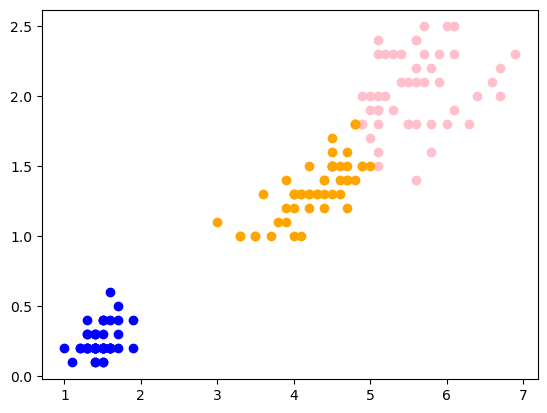

In [12]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='pink')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='orange')

# Elbow plot


In [22]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k,init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    km.fit(df)
    sse.append(km.inertia_)

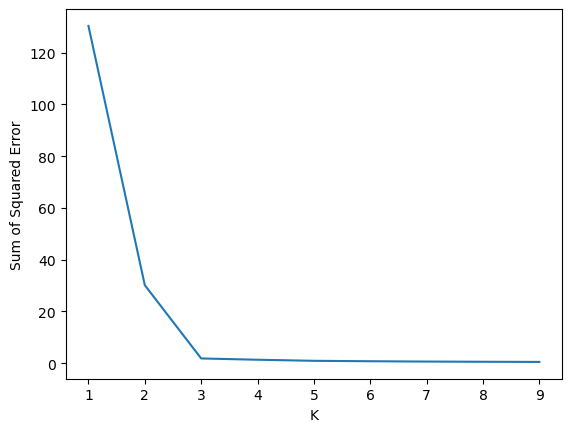

In [23]:
plt.xlabel('K')
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng,sse)

In [16]:
scaler=MinMaxScaler()
df['petal length (cm)']=scaler.fit_transform(df[['petal length (cm)']])
df['petal width (cm)']=scaler.fit_transform(df[['petal width (cm)']])
df

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [17]:
km=KMeans(n_clusters=3)
km.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

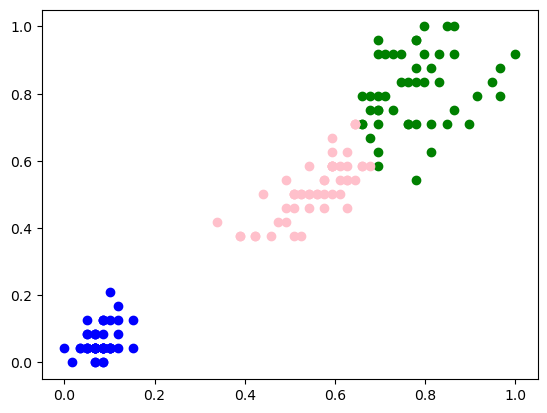

In [19]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='pink')

In [24]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k,init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    km.fit(df)
    sse.append(km.inertia_)
    

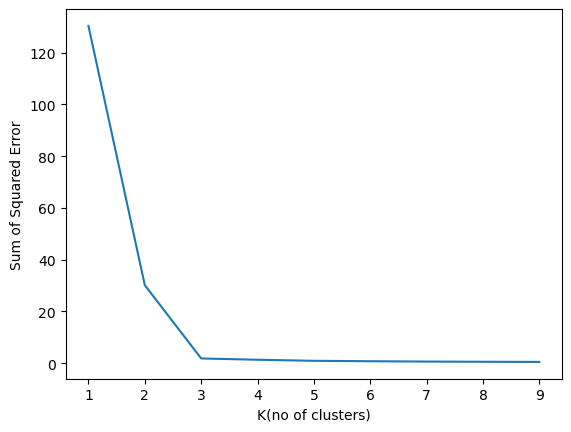

In [25]:
plt.xlabel("K(no of clusters)")
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng,sse)